<a href="https://colab.research.google.com/github/singhSnehal/ML/blob/main/image_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

**1. Mount the Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Move to the place where data resides**

In [40]:
%cd /content/drive/MyDrive/Machine Learning/Covid19

/content/drive/MyDrive/Machine Learning/Covid19


In [3]:
!ls

archive.zip  COVID-19_Radiography_Dataset  split


**3. Unziping the dataset**

In [59]:
!unzip archive.zip

Archive:  archive.zip
replace COVID-19_Radiography_Dataset/COVID.metadata.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**4. Install split folder python package**

In [5]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [46]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Machine Learning/Covid19/covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:01, 77.03 files/s]


**6. Loading the dataset with normalization in batches**

In [47]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 49152)             0         
                                                                 
 dense_12 (Dense)            (None, 32)                1572896   
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,575,203
Trainable params: 1,575,203
Non-trainable params: 0
_________________________________________________________________


In [10]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 5.7 MB/s 


**8. Model Compilation and Training**

In [50]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      #steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      #validation_steps=validation_generator.samples/validation_generator.batch_size,
      #verbose=0
      )

Epoch 1/10
15/15 [==============================] - 1s 61ms/step - loss: 1.2431 - acc: 0.3417 - val_loss: 1.1577 - val_acc: 0.3333
Epoch 2/10
15/15 [==============================] - 1s 47ms/step - loss: 1.0229 - acc: 0.5250 - val_loss: 0.9361 - val_acc: 0.8667
Epoch 3/10
15/15 [==============================] - 1s 48ms/step - loss: 0.9003 - acc: 0.6167 - val_loss: 0.8215 - val_acc: 0.6000
Epoch 4/10
15/15 [==============================] - 1s 47ms/step - loss: 0.8059 - acc: 0.7417 - val_loss: 0.7754 - val_acc: 0.6667
Epoch 5/10
15/15 [==============================] - 1s 47ms/step - loss: 0.7302 - acc: 0.7167 - val_loss: 0.6513 - val_acc: 0.8667
Epoch 6/10
15/15 [==============================] - 1s 48ms/step - loss: 0.6762 - acc: 0.7583 - val_loss: 0.8455 - val_acc: 0.4667
Epoch 7/10
15/15 [==============================] - 1s 46ms/step - loss: 0.7012 - acc: 0.7333 - val_loss: 0.5638 - val_acc: 0.8000
Epoch 8/10
15/15 [==============================] - 1s 50ms/step - loss: 0.6335 - a

**9. Model saving**

In [51]:
model.save('covid_classification.h5')

**10. Model loading**

In [52]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [53]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [54]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [55]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

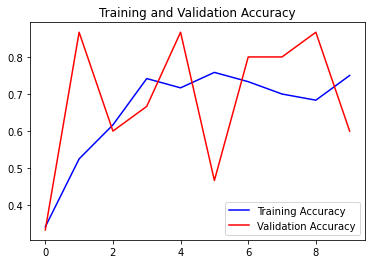

<Figure size 432x288 with 0 Axes>

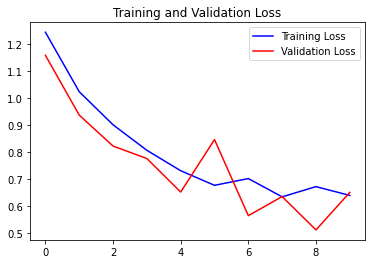

In [56]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [58]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 42ms/step - loss: 0.7820 - acc: 0.6000
[0.7819774746894836, 0.6000000238418579]
['loss', 'acc']
